In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Unnamed: 0,Model,Year,Status,Mileage,Price,MSRP
0,0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [4]:
df.drop(["Unnamed: 0", "MSRP", "Mileage"], axis = 1, inplace = True)

In [5]:
df.head()

,Model,Year,Status,Price
0,2022 Acura TLX A-Spec,2022,New,"$49,445"
1,2023 Acura RDX A-Spec,2023,New,"$50,895"
2,2023 Acura TLX Type S,2023,New,"$57,745"
3,2023 Acura TLX Type S,2023,New,"$57,545"
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"$40,990"


In [6]:
df["Model"] = df["Model"].str[5:]

In [7]:
df.head()

,Model,Year,Status,Price
0,Acura TLX A-Spec,2022,New,"$49,445"
1,Acura RDX A-Spec,2023,New,"$50,895"
2,Acura TLX Type S,2023,New,"$57,745"
3,Acura TLX Type S,2023,New,"$57,545"
4,Acura MDX Sport Hybrid 3.0L w/Technology Package,2019,Used,"$40,990"


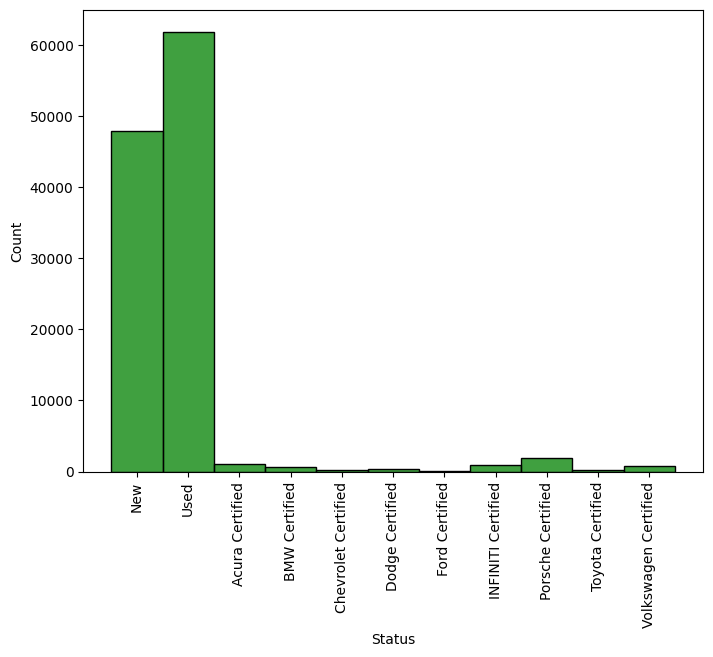

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(df.Status, color = "green")
plt.xticks(rotation=90)
plt.show()

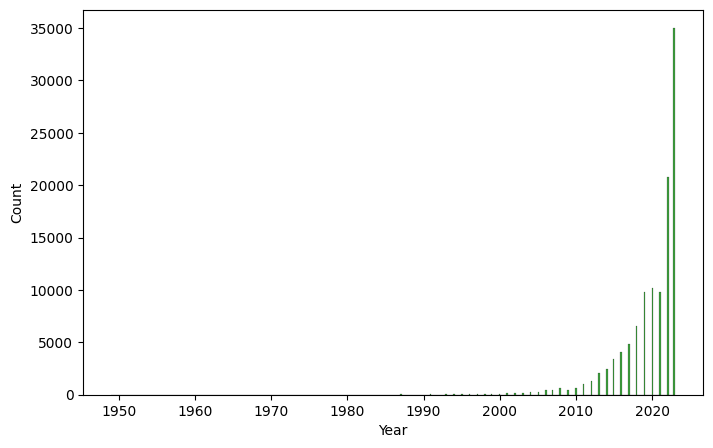

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df.Year,color="green")
plt.show()

In [10]:
df = df[df["Status"].isin(["New", "Used"])]

In [11]:
df.head()

,Model,Year,Status,Price
0,Acura TLX A-Spec,2022,New,"$49,445"
1,Acura RDX A-Spec,2023,New,"$50,895"
2,Acura TLX Type S,2023,New,"$57,745"
3,Acura TLX Type S,2023,New,"$57,545"
4,Acura MDX Sport Hybrid 3.0L w/Technology Package,2019,Used,"$40,990"


In [12]:
df["Price"] = df["Price"].replace({"\$":"",",":""}, regex = True)

In [13]:
df.head()

,Model,Year,Status,Price
0,Acura TLX A-Spec,2022,New,49445
1,Acura RDX A-Spec,2023,New,50895
2,Acura TLX Type S,2023,New,57745
3,Acura TLX Type S,2023,New,57545
4,Acura MDX Sport Hybrid 3.0L w/Technology Package,2019,Used,40990


In [14]:
Model_stats = df["Model"].value_counts(ascending=False)

In [15]:
Model_stats

Tesla Model 3 Long Range                1803
Mercedes-Benz S-Class S 580 4MATIC      1416
Tesla Model Y Long Range                 993
Tesla Model 3 Standard Range Plus        969
INFINITI QX80 Luxe                       900
                                        ... 
Porsche Panamera PLUS W/NAV                1
Porsche Cayenne Turbo S E-Hybrid           1
Chevrolet Express 1500 RWD 1500 135'       1
Porsche Taycan 4                           1
Volkswagen Golf GTI 2.0T SE 2-Door         1
Name: Model, Length: 3410, dtype: int64

In [16]:
len(Model_stats)

3410

In [17]:
len(Model_stats[Model_stats>10])

1204

In [18]:
Model_stats_less_than_10 = Model_stats[Model_stats<=10]

In [19]:
Model_stats_less_than_10

Chevrolet Impala 2LZ                    10
Lexus ES 330                            10
Ford Transit-350 Base                   10
Lexus LS 430                            10
Lexus GS 300                            10
                                        ..
Porsche Panamera PLUS W/NAV              1
Porsche Cayenne Turbo S E-Hybrid         1
Chevrolet Express 1500 RWD 1500 135'     1
Porsche Taycan 4                         1
Volkswagen Golf GTI 2.0T SE 2-Door       1
Name: Model, Length: 2206, dtype: int64

In [20]:
df.Model = df.Model.apply(lambda x: "Other" if x in Model_stats_less_than_10 else x)
len(df.Model.unique())

1205

In [21]:
df.head()

,Model,Year,Status,Price
0,Acura TLX A-Spec,2022,New,49445
1,Acura RDX A-Spec,2023,New,50895
2,Acura TLX Type S,2023,New,57745
3,Acura TLX Type S,2023,New,57545
4,Other,2019,Used,40990


In [22]:
df.Price.describe()

count         109701
unique         36050
top       Not Priced
freq             640
Name: Price, dtype: object

In [23]:
df =df[(df["Price"]!="Not Priced")]

In [24]:
df.Price = df.Price.astype(int)

In [25]:
df.Price.describe()

count    1.090610e+05
mean     5.096194e+04
std      3.737151e+04
min      1.800000e+03
25%      2.967200e+04
50%      4.315500e+04
75%      6.099500e+04
max      2.499900e+06
Name: Price, dtype: float64

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df["Status"] = df["Status"].replace({"New":1, "Used":0})

In [28]:
dummies = pd.get_dummies(df.Model)

In [29]:
dummies.head()

,Acura ILX,Acura ILX 2.0L,Acura ILX 2.0L Technology,Acura ILX 2.0L w/Premium Package,Acura ILX 2.4L,Acura ILX Base,Acura ILX Premium & A-SPEC Packages,Acura ILX Premium Package,Acura ILX Technology Package,Acura ILX Technology Plus Package,...,Volkswagen Tiguan 2.0T SEL R-Line Black,Volkswagen Tiguan Limited 2.0T,Volkswagen Tiguan S,Volkswagen Tiguan SE,Volkswagen Tiguan SEL,Volkswagen Touareg Lux,Volkswagen Touareg V6 Wolfsburg Edition,Volkswagen Touareg VR6,Volkswagen e-Golf SE,Volkswagen e-Golf SEL Premium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df = pd.concat([df, dummies.drop("Lexus LX 470 ", axis = "columns")], axis = "columns")

In [31]:
df.head()

,Model,Year,Status,Price,Acura ILX,Acura ILX 2.0L,Acura ILX 2.0L Technology,Acura ILX 2.0L w/Premium Package,Acura ILX 2.4L,Acura ILX Base,...,Volkswagen Tiguan 2.0T SEL R-Line Black,Volkswagen Tiguan Limited 2.0T,Volkswagen Tiguan S,Volkswagen Tiguan SE,Volkswagen Tiguan SEL,Volkswagen Touareg Lux,Volkswagen Touareg V6 Wolfsburg Edition,Volkswagen Touareg VR6,Volkswagen e-Golf SE,Volkswagen e-Golf SEL Premium
0,Acura TLX A-Spec,2022,1,49445,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acura RDX A-Spec,2023,1,50895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acura TLX Type S,2023,1,57745,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Acura TLX Type S,2023,1,57545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Other,2019,0,40990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.shape

(109061, 1208)

In [33]:
df = df.drop(["Model"], axis = 1)

In [34]:
X = df.drop(["Status"], axis = 1)
df.head()

,Year,Status,Price,Acura ILX,Acura ILX 2.0L,Acura ILX 2.0L Technology,Acura ILX 2.0L w/Premium Package,Acura ILX 2.4L,Acura ILX Base,Acura ILX Premium & A-SPEC Packages,...,Volkswagen Tiguan 2.0T SEL R-Line Black,Volkswagen Tiguan Limited 2.0T,Volkswagen Tiguan S,Volkswagen Tiguan SE,Volkswagen Tiguan SEL,Volkswagen Touareg Lux,Volkswagen Touareg V6 Wolfsburg Edition,Volkswagen Touareg VR6,Volkswagen e-Golf SE,Volkswagen e-Golf SEL Premium
0,2022,1,49445,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,1,50895,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023,1,57745,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,1,57545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,0,40990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = df.Status
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Status, dtype: int64

In [36]:
len(y)

109061

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10620,  1732],
       [ 5508,  3953]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

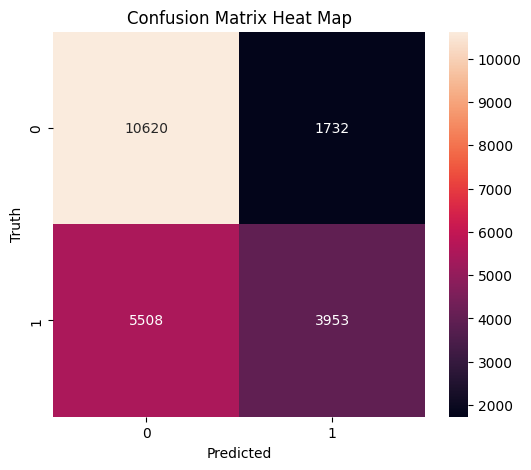

In [40]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix Heat Map")

In [41]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
accuracy

66.80878375280795

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11060,  1292],
       [ 1520,  7941]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

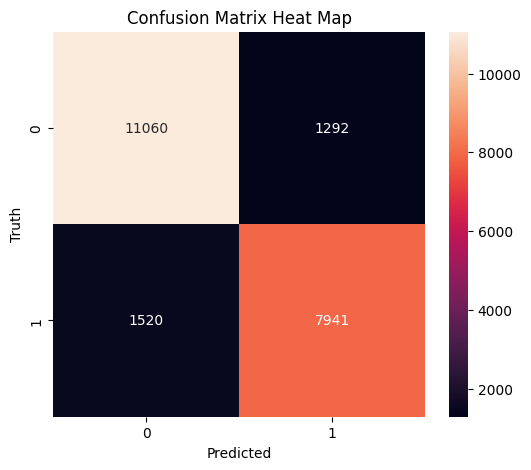

In [44]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix Heat Map")

In [45]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
accuracy

87.10860496034475

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12041,   311],
       [  265,  9196]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

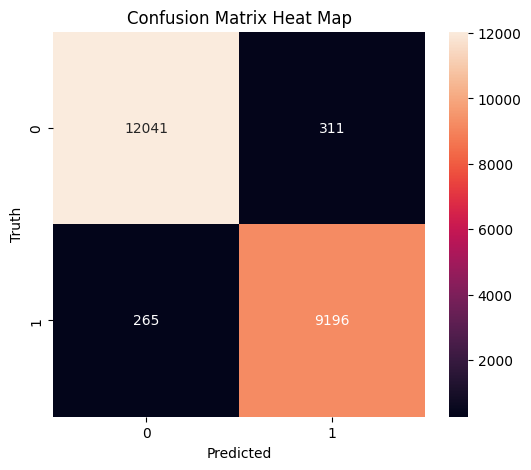

In [48]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix Heat Map")

In [49]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
accuracy

97.35937285105213

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 5, criterion = "entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12029,   323],
       [  236,  9225]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

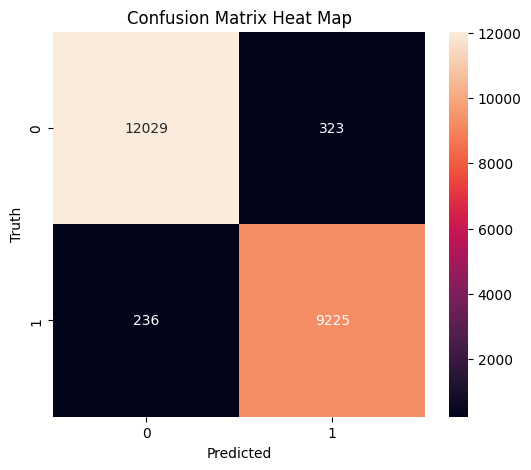

In [52]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix Heat Map")

In [53]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
accuracy

97.43730802732316

In [54]:
def predict_status(Model: str, Year: int, Price: float) -> str:
    index = np.where(X.columns == Model)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = Year
    x[1] = Price
    x[index] = 1
    
    status = model.predict([x])[0]
    if status == 1:
        return "New"
    if status == 0:
        return "Old"

In [55]:
predict_status("Volkswagen Tiguan 2.0T SE", 2022, 50000)

C:\Users\Rana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'New'

In [56]:
import pickle
with open("model.pickle", "wb") as f:
    pickle.dump(model, f)

In [57]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))